In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(images_train, targets_train), (images_test, targets_test) = tf.keras.datasets.mnist.load_data()

print(images_train.shape)
print(targets_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


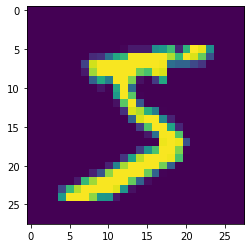

In [6]:
plt.imshow(images_train[0])

In [7]:
targets_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

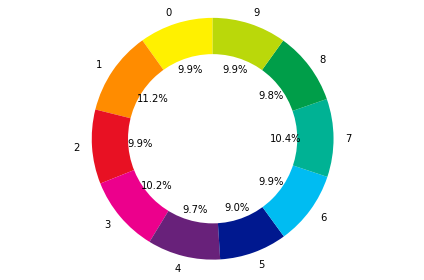

In [8]:
labels = targets_names
sizes = np.unique(targets_train,return_counts=True)[1]

# Choix des couleurs

colors =['#fff100','#ff8c00','#e81123','#ec008c','#68217a',    '#00188f',
'#00bcf2','#00b294','#009e49','#bad80a']
 
# Construction du diagramme et affichage des labels et des #fréquences en pourcentage

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

# Tracé du cercle au milieu

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Affichage du diagramme

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [9]:
# On converti nos valeurs en float

images_train = images_train.astype(float)
images_test = images_test.astype(float)

# On normalise les pixels pour avoir des valeurs entre 0 et 1

images_train = images_train/255
images_test = images_test/255

In [10]:
model = tf.keras.models.Sequential()

In [11]:
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [13]:
history = model.fit(images_train,
                    targets_train,
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2297 - accuracy: 0.9307 - val_loss: 0.1149 - val_accuracy: 0.9662
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0921 - accuracy: 0.9709 - val_loss: 0.1061 - val_accuracy: 0.9678
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0643 - accuracy: 0.9797 - val_loss: 0.0896 - val_accuracy: 0.9733
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0459 - accuracy: 0.9849 - val_loss: 0.1003 - val_accuracy: 0.9738
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0367 - accuracy: 0.9875 - val_loss: 0.1095 - val_accuracy: 0.9707
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0987 - val_accuracy: 0.9755
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0277 - accuracy: 0.9905 - val_loss: 0.1052 - val_accuracy:

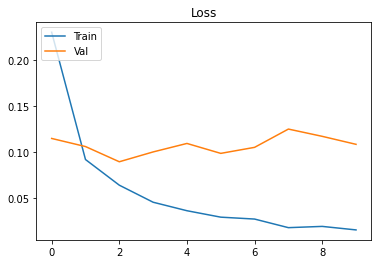

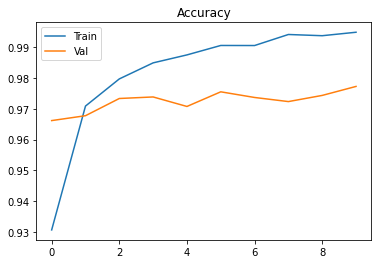

In [14]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [15]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1056 - accuracy: 0.9779
Test Loss 0.10557301342487335
Test Accuracy 0.9779000282287598
